# Analysis of the effectiveness of Covid19 vaccines



The following work aims to analyze the efficacy of coronary vaccines in Israel by comparing the different coronary waves and morbidity data according to patients' distribution of vaccinated status.

# Import Libraries

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates
import plotly.express as px
import plotly.graph_objects as go


# Load our Data.

In [2]:
vaccination_df = pd.read_csv('../input/effectiveness-of-covid19-vaccines-in-israel/Culmulativ pecentage of vaccines.csv' , index_col=0)
New_case_df = pd.read_csv('../input/effectiveness-of-covid19-vaccines-in-israel/New Cases - vaccination.csv' , index_col=0)
Deaths_df = pd.read_csv('../input/effectiveness-of-covid19-vaccines-in-israel/New Death - vaccination.csv' , index_col=0)
critical_df = pd.read_csv('../input/effectiveness-of-covid19-vaccines-in-israel/Severe Cases - vaccination.csv', index_col=0)
cases_df = pd.read_csv('../input/israel-coronavirus-dataset/corona_age_and_gender.csv' , index_col=0)
            

In [3]:
cases_df.index= pd.to_datetime(cases_df.index, format = '%d/%m/%Y')
vaccination_df.index= pd.to_datetime(vaccination_df.index, format = '%d-%m-%Y')
New_case_df.index= pd.to_datetime(New_case_df.index, format = '%d-%m-%Y')
critical_df.index= pd.to_datetime(critical_df.index, format = '%d-%m-%Y')
Deaths_df.index= pd.to_datetime(Deaths_df.index, format = '%d-%m-%Y')



**Prepare data for plotting**

In [4]:
def rolling_average(df , colunms , day):
    for col in colunms:
        df[col] = df.rolling(window=day)[col].mean()
    df = df.fillna(0)

In [5]:
Gcases_df =  cases_df.groupby('first_week_day').sum()

# **Let's explore the data**

In [6]:
vaccination_df.head()


,Vaccinated firs dose,Vaccinated second dose,Vaccinated third dose,Percentage of vaccinated first dose,Percentage of vaccinated second dose,Percentage of vaccinated third dose
Date,,,,,,
2020-12-19,64,1,0,0.00,0.0,0.0
2020-12-20,7447,1,0,0.08,0.0,0.0
2020-12-21,32351,1,0,0.35,0.0,0.0
2020-12-22,76983,1,0,0.83,0.0,0.0
2020-12-23,139864,1,0,1.50,0.0,0.0


In [7]:
New_case_df.head()


,age group,New cases vaccinated,New cases expired Vaccination,New cases Not vaccinated,New cases vaccinated per 100k,New cases expired Vaccination per 100k,New cases Not vaccinated per 100k
Date,,,,,,,
2021-01-17,60+,0,0,243,0.0,0.0,51.4
2021-01-17,All population,1,0,4729,3.9,0.0,66.3
2021-01-17,0-59,1,0,4450,6.4,0.0,66.9
2021-01-18,All population,6,0,8738,13.2,0.0,123.8
2021-01-18,0-59,2,0,8309,7.9,0.0,126.0


In [8]:
cases_df.head()

,last_week_day,age_group,gender,weekly_tests_num,weekly_cases,weekly_deceased
first_week_day,,,,,,
2020-03-15,21/03/2020,0-19,Men,1115,44,0
2020-03-15,21/03/2020,0-19,Not Binary,0,0,0
2020-03-15,21/03/2020,0-19,Women,1065,39,0
2020-03-15,21/03/2020,20-24,Men,613,92,0
2020-03-15,21/03/2020,20-24,Not Binary,0,0,0


In [9]:
critical_df.head()

,age group,Severe cases vaccinated,Severe cases expired Vaccination,Severe cases Not vaccinated,Severe cases vaccinated per 100k,Severe cases expired Vaccination per 100k,Severe cases Not vaccinated per 100k,New Severe cases vaccinated,New severe cases expired Vaccination,New severe cases Not vaccinated,New severe cases vaccinated per 100k,New severe cases expired Vaccination per 100k,New severe cases Not vaccinated per 100k
Date,,,,,,,,,,,,,
2021-01-17,60+,0,0,555,0.0,0.0,117.4,0,0,58,0.0,0.0,12.3
2021-01-17,All population,0,0,805,0.0,0.0,11.3,0,0,94,0.0,0.0,1.3
2021-01-17,0-59,0,0,250,0.0,0.0,3.8,0,0,36,0.0,0.0,0.5
2021-01-18,60+,1,0,557,5.0,0.0,119.5,1,0,66,5.0,0.0,14.2
2021-01-18,All population,1,0,792,2.2,0.0,11.2,1,0,99,2.2,0.0,1.4


In [10]:
Deaths_df.head()

,age group,New Death vaccinated,New Death expired Vaccination,New Death Not vaccinated,New Death vaccinated per 100k,New Death expired Vaccination per 100k,New Death Not vaccinated per 100k
Date,,,,,,,
2021-01-17,60+,0,0,25,0.0,0.0,5.3
2021-01-17,All population,0,0,30,0.0,0.0,0.4
2021-01-17,0-59,0,0,5,0.0,0.0,0.1
2021-01-18,All population,0,0,26,0.0,0.0,0.4
2021-01-18,0-59,0,0,8,0.0,0.0,0.1


In [11]:
fig = px.line( Gcases_df, y = 'weekly_cases', title='Israel covid19')
fig.show()

In Israel, we went through four waves of the Covid19 epidemic when in the third wave we started vaccinating the population in the first dose, and in the fourth wave we vaccinated with a third vaccine. We will focus on analyzing these two waves

# Third wave Analysis 

In [12]:
result = pd.concat([Gcases_df.loc['2020-11-1':'2021-04-1'], vaccination_df.loc['2020-11-1':'2021-04-1']], axis=1)

In [13]:
result = result.fillna(0)
result.head()

,weekly_tests_num,weekly_cases,weekly_deceased,Vaccinated firs dose,Vaccinated second dose,Vaccinated third dose,Percentage of vaccinated first dose,Percentage of vaccinated second dose,Percentage of vaccinated third dose
2020-11-01,209093.0,4542.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-11-08,223547.0,4580.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-11-15,275904.0,5081.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-11-22,314208.0,6372.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-11-29,373386.0,9026.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:

from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x = result.index, y = result['weekly_cases'], name='weekly_cases'),
    secondary_y=False
)

fig.add_trace(
    go.Scatter(x = result.index, y = result['Percentage of vaccinated first dose'], name="Percentage of vaccinated first dose"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Third wave Analysis "
)

# Set x-axis title
fig.update_xaxes(title_text="Date")

# Set y-axes titles
fig.update_yaxes(title_text="<b>weekly_cases</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Percentage of vaccinated first dose</b>", secondary_y=True)

fig.show()


We see that as soon as we reached the 40% of the population vaccinated
ןn the first dose, the third wave started to go down.
The vaccine is divided in the first stage into the older age groups. We will try to see if there was a difference in the rate of decline between the different age groups

<AxesSubplot:xlabel='first_week_day', ylabel='weekly_cases'>

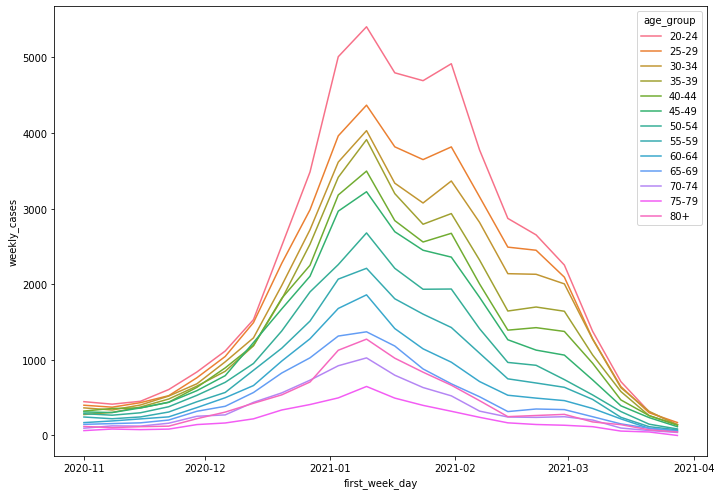

In [15]:
age_group_case_df =  cases_df.loc['2020-11-1':'2021-04-1'].groupby(['first_week_day','age_group']).sum()
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(ax=ax,data=age_group_case_df.drop('0-19', level=1), hue='age_group', x='first_week_day', y='weekly_cases')

We see significant gaps between the lines of the age groups, which indicates the decrease of the age groups that first received the vaccine happened much faster.
To test the hypothesis, we made a comparison to the second wave between the dates 1-06-2020 to 1-11-2020, and we will see if the decrease there happened in a similar way

<AxesSubplot:xlabel='first_week_day', ylabel='weekly_cases'>

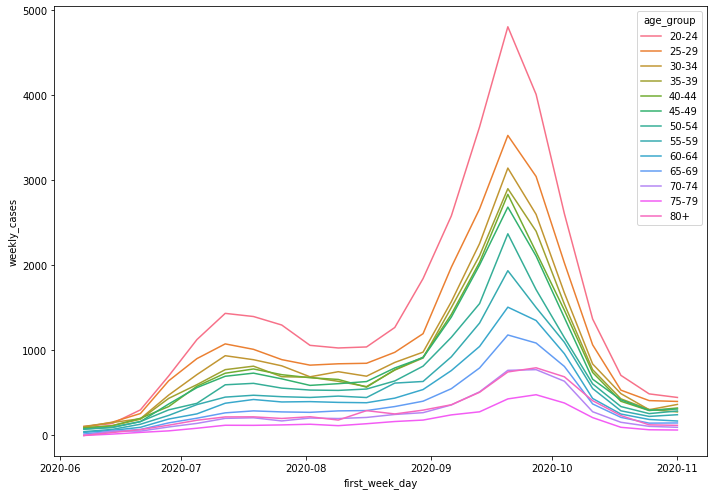

In [16]:
age_group_case_df =  cases_df.loc['2020-06-1':'2020-11-1'].groupby(['first_week_day','age_group']).sum()
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(ax=ax,data=age_group_case_df.drop('0-19', level=1), hue='age_group', x='first_week_day', y='weekly_cases')

We see that there were almost no gaps in the rate of decline between age groups in the second wave, which strengthens our hypothesis.
Let us now look at the morbidity and mortality in the third wave.

In [17]:
critical60Plus_df = critical_df[critical_df['age group'] == '60+']
critical_All_df = critical_df[critical_df['age group'] == 'All population']
critical_0_59_df = critical_df[critical_df['age group'] == '0-59']

In [18]:
cases60Plus_df = New_case_df[New_case_df['age group'] == '60+']
cases_All_df = New_case_df[New_case_df['age group'] == 'All population']
cases_0_59_df = New_case_df[New_case_df['age group'] == '0-59']

In [19]:
death60Plus_df = Deaths_df[Deaths_df['age group'] == '60+']
death_All_df = Deaths_df[Deaths_df['age group'] == 'All population']
death_0_59_df = Deaths_df[Deaths_df['age group'] == '0-59']

In [20]:
critical_0_59_df.head()

,age group,Severe cases vaccinated,Severe cases expired Vaccination,Severe cases Not vaccinated,Severe cases vaccinated per 100k,Severe cases expired Vaccination per 100k,Severe cases Not vaccinated per 100k,New Severe cases vaccinated,New severe cases expired Vaccination,New severe cases Not vaccinated,New severe cases vaccinated per 100k,New severe cases expired Vaccination per 100k,New severe cases Not vaccinated per 100k
Date,,,,,,,,,,,,,
2021-01-17,0-59,0,0,250,0.0,0.0,3.8,0,0,36,0.0,0.0,0.5
2021-01-18,0-59,0,0,235,0.0,0.0,3.6,0,0,33,0.0,0.0,0.5
2021-01-19,0-59,0,0,225,0.0,0.0,3.4,0,0,35,0.0,0.0,0.5
2021-01-20,0-59,0,0,226,0.0,0.0,3.5,0,0,30,0.0,0.0,0.5
2021-01-21,0-59,1,0,229,1.4,0.0,3.6,1,0,38,1.4,0.0,0.6


In [21]:
l = list(critical_0_59_df.columns.values.tolist())
l.remove('age group')
rolling_average(critical_0_59_df,l,7)
rolling_average(critical_All_df,l,7)
rolling_average(critical60Plus_df,l,7)

l1 = list(cases_All_df.columns.values.tolist())
l1.remove('age group')
rolling_average(cases_0_59_df,l1,7)
rolling_average(cases_All_df,l1,7)
rolling_average(cases60Plus_df,l1,7)

l2 = list(death60Plus_df.columns.values.tolist())
l2.remove('age group')
rolling_average(death_0_59_df,l2,7)
rolling_average(death_All_df,l2,7)
rolling_average(death60Plus_df,l2,7)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [22]:
n = l.copy()
for i in range (3):
    n.remove(n[len(n)-1])
l.append('age group')
n.append('age group')

n1 = l1.copy()
for i in range (3):
    n1.remove(n1[len(n1)-1])
l1.append('age group')
n1.append('age group')

n2 = l2.copy()
for i in range (3):
    n2.remove(n2[len(n2)-1])
l2.append('age group')
n2.append('age group')

In [23]:
l.remove('New Severe cases vaccinated')
l.remove('New severe cases expired Vaccination')
l.remove('New severe cases Not vaccinated')

l1.remove('New cases vaccinated')
l1.remove('New cases expired Vaccination  ')
l1.remove('New cases Not vaccinated')

l2.remove('New Death  vaccinated')
l2.remove('New Death  expired Vaccination  ')
l2.remove('New Death  Not vaccinated')

In [24]:
fig = px.line(critical60Plus_df['2020-11-1':'2021-04-1'].drop(l ,axis = 1), title='New Severe cases age group - 60+')
fig.show()

In [25]:
fig = px.line(death60Plus_df['2020-11-1':'2021-04-1'].drop(l2 ,axis = 1), title='New Death age group - 60+')
fig.show()

We see that at the end of the third wave, there were almost 5 times more severely ill patients over the age of 60 who were not vaccinated than vaccinated.
But since most of the 60+ were vaccinated, we would like to look at the data in a way that is normalized to the size of the population.

In [26]:
fig = px.line(critical60Plus_df['2020-11-1':'2021-04-1'].drop(n ,axis = 1), title='New Severe cases age group - 60+ per 100k')
fig.show()

In [27]:
fig = px.line(death60Plus_df['2020-11-1':'2021-04-1'].drop(n2 ,axis = 1), title='New Death age group - 60+')
fig.show()

Here we see that the gap widens to almost 14 times as many unvaccinated patients for every severely vaccinated patient.

# Analysis of fourth wave data

The fourth wave of Covid19 in Israel began around June 2021 and was characterized by the morbidity of vaccinated that more than half a year has passed since they received the second vaccine.
Following this, it was decided that Israel would start giving a third dose of the vaccine.

In [28]:
casecases_All_df = pd.concat([cases_All_df , vaccination_df['Percentage of vaccinated third dose']], axis=1)
cases60Plus_df = pd.concat([cases60Plus_df , vaccination_df['Percentage of vaccinated third dose']], axis=1)
critical60Plus_df = pd.concat([critical60Plus_df , vaccination_df['Percentage of vaccinated third dose']], axis=1)
death60Plus_df = pd.concat([death60Plus_df , vaccination_df['Percentage of vaccinated third dose']], axis=1)

In [29]:
fig = px.line(cases_All_df['2021-06-1':'2021-11-1'].drop(n1 ,axis = 1), title='New  cases per 100k')
fig.show()

In [30]:
fig = px.line(cases60Plus_df['2021-06-1':'2021-11-1'].drop(l1 ,axis = 1), title='New  cases age group: 60+')
fig.show()

In [31]:
fig = px.line(cases60Plus_df['2021-06-1':'2021-11-1'].drop(n1 ,axis = 1), title='New  cases age group: 60+ , per 100k')
fig.show()

In [32]:

fig = px.line(critical60Plus_df['2021-06-1':'2021-11-1'].drop(l ,axis = 1), title='New critical cases age group: 60+ ')
fig.show()

In [33]:
fig = px.line(critical60Plus_df['2021-06-1':'2021-11-1'].drop(n ,axis = 1), title='New critical cases age group: 60+ , per 100k')
fig.show()

**In the next two graphs it is recommended to look at them again after disappearing the purple line to see the significant difference in mortality between vaccinated and unvaccinated.**

In [34]:

fig = px.line(death60Plus_df['2021-06-1':'2021-11-1'].drop(l2 ,axis = 1), title='New Death age group: 60+ ')
fig.show()

In [35]:
fig = px.line(death60Plus_df['2021-06-1':'2021-11-1'].drop(n2 ,axis = 1), title='New Death age group: 60+ , per 100k')
fig.show()

Also in the fourth wave we see that the decrease in morbidity begins when it comes to around 30% -40% of the population vaccinated with a third vaccine and the big difference in the severe morbidity and mortality between vaccinated and unvaccinated

# I would love to receive comments to improve my code and the dataset